<a href="https://colab.research.google.com/github/raj-vijay/mv/blob/master/Image%20Processing/07_Image_Processing_Experiments_Restoration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Restoration**

Image restoration is the operation of taking a corrupt/noisy image and estimating the clean, original image. 

Corruption may come in many forms such as motion blur, noise and camera mis-focus. Image restoration is performed by reversing the process that blurred the image and such is performed by imaging a point source and use the point source image, which is called the Point Spread Function (PSF) to restore the image information lost to the blurring process.

Image restoration is different from image enhancement in that the latter is designed to emphasize features of the image that make the image more pleasing to the observer, but not necessarily to produce realistic data from a scientific point of view. Image enhancement techniques (like contrast stretching or de-blurring by a nearest neighbor procedure) provided by imaging packages use no a priori model of the process that created the image.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
def show_image(image, title='Image', cmap_type='gray'):
  plt.imshow(image, cmap=cmap_type)
  plt.title(title)
  plt.axis('on')
  plt.show()

In [0]:
def plot_comparison(original, filtered, title_filtered):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True,
  sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray)
  ax1.set_title('Original')
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray)
  ax2.set_title(title_filtered)
  ax2.axis('off')

**Image reconstruction**


* Fixing damaged images
* Text removing
* Logo removing
* Object removing

**Inpainting**

Inpainting is a process of restorative conservation where damaged, deteriorating, or missing parts of an artwork are reconstructed, ultimately with the goal of presenting the image as it was originally created.

* Reconstructing lost parts of images
* Looking at the non-damaged regions

In [0]:
from skimage import data
image = data.astronaut()

In [4]:
# Load Defect Image
!wget https://assets.datacamp.com/production/repositories/4470/datasets/7bb38f37b41f40b9ef2e59b81f326a5e038d69b8/damaged_astronaut.png

--2020-04-18 10:27:53--  https://assets.datacamp.com/production/repositories/4470/datasets/7bb38f37b41f40b9ef2e59b81f326a5e038d69b8/damaged_astronaut.png
Resolving assets.datacamp.com (assets.datacamp.com)... 13.226.45.82, 13.226.45.40, 13.226.45.22, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|13.226.45.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 547097 (534K) [image/png]
Saving to: ‘damaged_astronaut.png’

damaged_astronaut.p 100%[===================>] 534.27K  --.-KB/s    in 0.1s    

2020-04-18 10:27:53 (4.94 MB/s) - ‘damaged_astronaut.png’ saved [547097/547097]



In [0]:
defect_image = plt.imread('damaged_astronaut.png')

In [0]:
def get_mask(image):
  ''' Creates mask with three defect regions '''
  mask = np.zeros(image.shape[:-1])
  mask[101:106, 0:240] = 1
  mask[152:154, 0:60] = 1
  mask[153:155, 60:100] = 1
  mask[154:156, 100:120] = 1
  mask[155:156, 120:140] = 1
  mask[212:217, 0:150] = 1
  mask[217:222, 150:256] = 1
  return mask

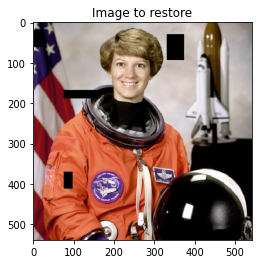

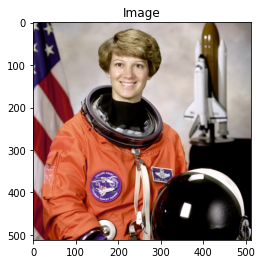

In [7]:
# Import the module from restoration
from skimage.restoration import inpaint

# Obtain the mask
mask = get_mask(defect_image)

# Show the defective image
show_image(defect_image, 'Image to restore')

# Apply the restoration function to the image using the mask
restored_image =inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)

show_image(image)

**Removing logos**

In [8]:
# Load Image
!wget https://assets.datacamp.com/production/repositories/4470/datasets/3fabad1e29879cba6fe5c0cb7d47d41cf9141437/4.2.06_w_logo_2_2.png

--2020-04-18 10:28:00--  https://assets.datacamp.com/production/repositories/4470/datasets/3fabad1e29879cba6fe5c0cb7d47d41cf9141437/4.2.06_w_logo_2_2.png
Resolving assets.datacamp.com (assets.datacamp.com)... 13.226.45.82, 13.226.45.40, 13.226.45.22, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|13.226.45.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 306535 (299K) [image/png]
Saving to: ‘4.2.06_w_logo_2_2.png’

4.2.06_w_logo_2_2.p 100%[===================>] 299.35K  --.-KB/s    in 0.09s   

2020-04-18 10:28:00 (3.24 MB/s) - ‘4.2.06_w_logo_2_2.png’ saved [306535/306535]



In [0]:
image_with_logo = plt.imread('4.2.06_w_logo_2_2.png')

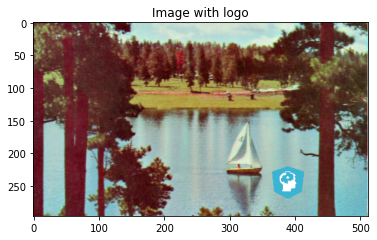

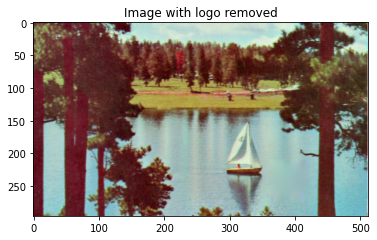

In [10]:
# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:272, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo, mask, multichannel=True)

# Show the original and logo removed images
show_image(image_with_logo, 'Image with logo')
show_image(image_logo_removed, 'Image with logo removed')

**Noise**

Image noise is random variation of brightness or color information in images, and is usually an aspect of electronic noise. 

It can be produced by the image sensor and circuitry of a scanner or digital camera. Image noise can also originate in film grain and in the unavoidable shot noise of an ideal photon detector. Image noise is an undesirable by-product of image capture that obscures the desired information.

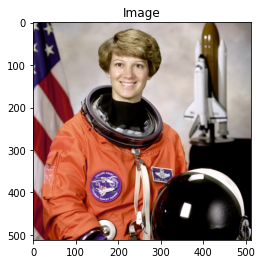

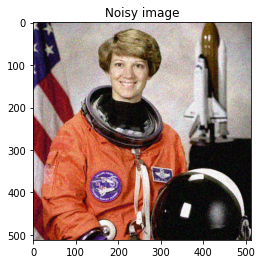

In [11]:
# Import the module and function
from skimage.util import random_noise
# Add noise to the image
noisy_image = random_noise(image)
# Show original and resulting image
show_image(image)
show_image(noisy_image, 'Noisy image')

**Image Denoising**

Image noise may be caused by different intrinsic (i.e., sensor) and extrinsic (i.e., environment) conditions which are often not possible to avoid in practical situations. 

Therefore, image denoising plays an important role in a wide range of applications such as image restoration, visual tracking, image registration, image segmentation, and image classification, where obtaining the original image content is crucial for strong performance.

**Denoising types**

* Total variation (TV)
* Bilateral
* Wavelet denoising
* Non-local means denoising

**Total Variation (TV) Denoising**

In signal processing, total variation denoising, also known as total variation regularization, is a process, most often used in digital image processing, that has applications in noise removal. 

It is based on the principle that signals with excessive and possibly spurious detail have high total variation, that is, the integral of the absolute gradient of the signal is high. 

According to this principle, reducing the total variation of the signal subject to it being a close match to the original signal, removes unwanted detail whilst preserving important details such as edges.

In [12]:
# Load Image
!wget https://upload.wikimedia.org/wikipedia/commons/8/87/Highimgnoise.jpg

--2020-04-18 10:28:09--  https://upload.wikimedia.org/wikipedia/commons/8/87/Highimgnoise.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79856 (78K) [image/jpeg]
Saving to: ‘Highimgnoise.jpg’

Highimgnoise.jpg    100%[===================>]  77.98K  --.-KB/s    in 0.03s   

2020-04-18 10:28:09 (2.60 MB/s) - ‘Highimgnoise.jpg’ saved [79856/79856]



In [0]:
noise = plt.imread('Highimgnoise.jpg')

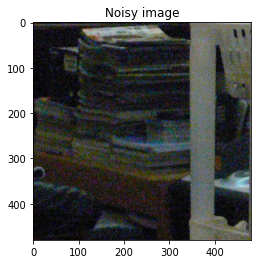

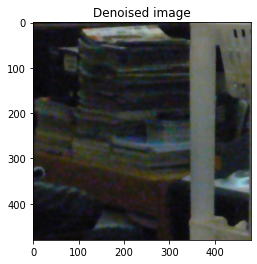

In [14]:
from skimage.restoration import denoise_tv_chambolle
# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noise,weight=0.1,multichannel=True)
# Show denoised image
show_image(noise, 'Noisy image')
show_image(denoised_image, 'Denoised image')

**Bilateral Denoising**

A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels. This weight can be based on a Gaussian distribution. Crucially, the weights depend not only on Euclidean distance of pixels, but also on the radiometric differences (e.g., range differences, such as color intensity, depth distance, etc.). This preserves sharp edges. 

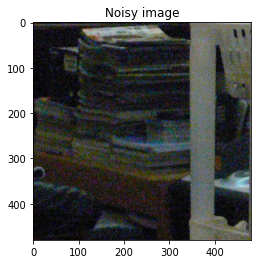

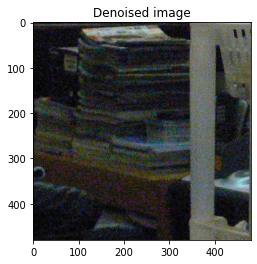

In [15]:
from skimage.restoration import denoise_bilateral
# Apply bilateral filter denoising
denoised_image = denoise_bilateral(noise, multichannel=True)
# Show original and resulting images
show_image(noise, 'Noisy image')
show_image(denoised_image, 'Denoised image')

**Add noise to an image**

In [16]:
# Load the image
!wget https://assets.datacamp.com/production/repositories/4470/datasets/b21f1547950fbfdde7c48643a706db0d158aac3b/fruits_square.jpg

--2020-04-18 10:28:12--  https://assets.datacamp.com/production/repositories/4470/datasets/b21f1547950fbfdde7c48643a706db0d158aac3b/fruits_square.jpg
Resolving assets.datacamp.com (assets.datacamp.com)... 13.226.45.82, 13.226.45.40, 13.226.45.22, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|13.226.45.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128237 (125K) [image/jpeg]
Saving to: ‘fruits_square.jpg’

fruits_square.jpg   100%[===================>] 125.23K  --.-KB/s    in 0.06s   

2020-04-18 10:28:12 (1.89 MB/s) - ‘fruits_square.jpg’ saved [128237/128237]



In [0]:
fruit_image = plt.imread('fruits_square.jpg')

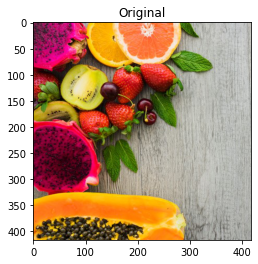

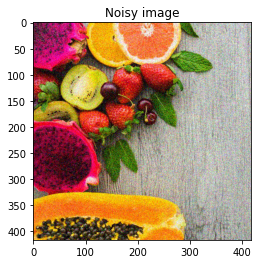

In [18]:
# Import the module and function
from skimage.util import random_noise

# Add noise to the image
noisy_image = random_noise(fruit_image)

# Show original and resulting image
show_image(fruit_image, 'Original')
show_image(noisy_image, 'Noisy image')

**Reducing noise of an Image**

In [19]:
# Load Image
!wget https://assets.datacamp.com/production/repositories/4470/datasets/856da76937ad35d3bb407d4f2e8ad7c26e40edac/miny.jpeg

--2020-04-18 10:28:14--  https://assets.datacamp.com/production/repositories/4470/datasets/856da76937ad35d3bb407d4f2e8ad7c26e40edac/miny.jpeg
Resolving assets.datacamp.com (assets.datacamp.com)... 13.226.45.82, 13.226.45.40, 13.226.45.22, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|13.226.45.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104081 (102K) [image/jpeg]
Saving to: ‘miny.jpeg’

miny.jpeg           100%[===================>] 101.64K  --.-KB/s    in 0.05s   

2020-04-18 10:28:14 (1.99 MB/s) - ‘miny.jpeg’ saved [104081/104081]



In [0]:
noisy_image = plt.imread('miny.jpeg')

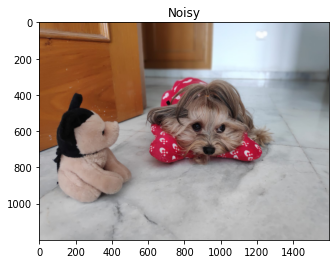

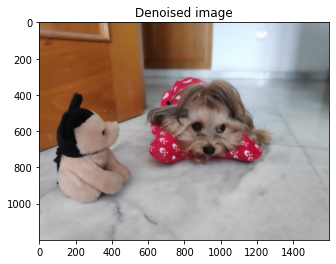

In [21]:
# Import the module and function
from skimage.restoration import denoise_tv_chambolle

# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image,multichannel=True)

# Show the noisy and denoised images
show_image(noisy_image, 'Noisy')
show_image(denoised_image, 'Denoised image')

**Reducing noise while preserving edges**

In [22]:
# Load Image
!wget https://assets.datacamp.com/production/repositories/4470/datasets/68eed92ae8b528be511a7b0b7734e04b5c0f2da8/noise-noisy-nature.jpg

--2020-04-18 10:28:26--  https://assets.datacamp.com/production/repositories/4470/datasets/68eed92ae8b528be511a7b0b7734e04b5c0f2da8/noise-noisy-nature.jpg
Resolving assets.datacamp.com (assets.datacamp.com)... 13.226.45.82, 13.226.45.40, 13.226.45.22, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|13.226.45.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 780374 (762K) [image/jpeg]
Saving to: ‘noise-noisy-nature.jpg’

noise-noisy-nature. 100%[===================>] 762.08K  --.-KB/s    in 0.1s    

2020-04-18 10:28:26 (5.95 MB/s) - ‘noise-noisy-nature.jpg’ saved [780374/780374]



In [0]:
landscape_image = plt.imread('noise-noisy-nature.jpg')

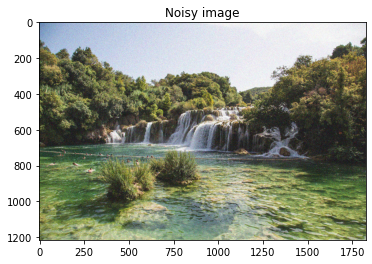

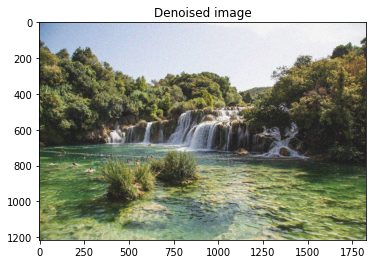

In [24]:
# Import bilateral denoising function
from skimage.restoration import denoise_bilateral

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(landscape_image,multichannel=True)

# Show original and resulting images
show_image(landscape_image, 'Noisy image')
show_image(denoised_image , 'Denoised image')

*Includes personal notes on Image Processing with Python from Datacamp